# Auto-encoder vs PCA avec des données sur les élections

In [1]:
import numpy as np
import pandas as pd
from turtle import * 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
elections=pandas.read_excel("dataElections.xlsx", encoding='utf8')

In [4]:
elections.head(2)

,Code.du.département,Libellé.du.département,Code.de.la.circonscription,Libellé.de.la.circonscription,Code.de.la.commune,Libellé.de.la.commune,Code.du.b.vote,Inscrits,Abstentions,X..Abs.Ins,...,Voix10,X..Voix.Ins10,X..Voix.Exp10,N.Panneau11,Sexe11,Nom11,Prénom11,Voix11,X..Voix.Ins11,X..Voix.Exp11
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,1,598,92,15.38,...,6,1.00,1.21,11,M,FILLON,François,110,18.39,22.22
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,1,209,25,11.96,...,1,0.48,0.57,11,M,FILLON,François,34,16.27,19.32


In [5]:
elections.shape

(69242, 98)

### 1) Principal Component Analysis (PCA)

In [6]:
from sklearn.decomposition import PCA

In [7]:
candidats=elections[["X..Voix.Ins1", "X..Voix.Ins2", "X..Voix.Ins3", "X..Voix.Ins4", "X..Voix.Ins5", "X..Voix.Ins6", "X..Voix.Ins7", "X..Voix.Ins8", "X..Voix.Ins9", "X..Voix.Ins10", "X..Voix.Ins11"]]
candidats.columns=["Nicolas DUPONT-AIGNAN", "Marine LE PEN", "Emmanuel MACRON", "Benoît HAMON", "Nathalie ARTHAUD", "Philippe POUTOU", "Jacques CHEMINADE", "Jean LASALLE", "Jean-Luc MELENCHON", "François ASSELINEAU", "François FILLON"]

In [8]:
pca = PCA(n_components=5)
pca.fit(candidats)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Estimation, calcul des composantes principales
C = pca.fit(candidats).transform(candidats)

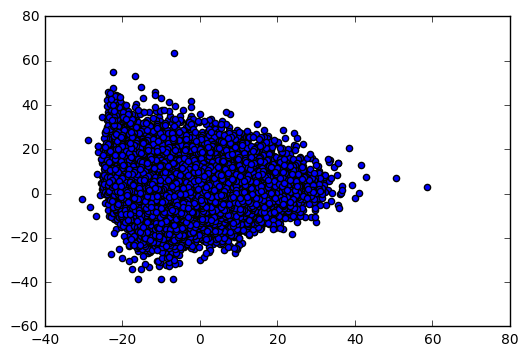

In [10]:
plt.scatter(C[:,0], C[:,1]) #, label=np.unique(elections[['Libellé.du.département']]))

In [11]:
print(C.shape)
print(elections.shape)

(69242, 5)
(69242, 98)


In [12]:
majoriteCommune=[]
for i in np.arange(candidats.shape[0]):
    majoriteCommune=np.append(majoriteCommune,np.array(candidats.columns[candidats.irow(i)==max(candidats.irow(i))])[0])
majoriteCommune

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  app.launch_new_instance()


array(['Marine LE PEN', 'Marine LE PEN', 'Marine LE PEN', ...,
       'Emmanuel MACRON', 'Emmanuel MACRON', 'Emmanuel MACRON'], 
      dtype='<U32')

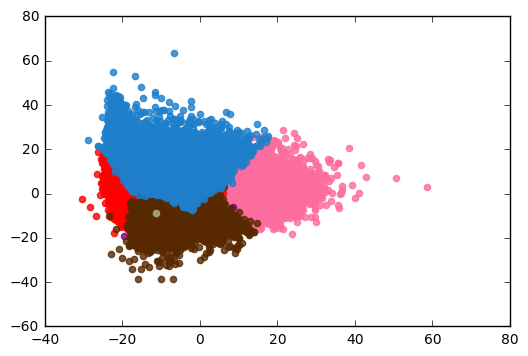

In [13]:
colors=["#372F25", "#FD6C9E", "#FF0000", "#800080", "#FFDE75", "#1FA055", "#ED7F10","#0131B4", "#582900", "#B3B191", "#1E7FCB"]
for color, i, target_name in zip(colors, candidats.columns, majoriteCommune):
    plt.scatter(C[majoriteCommune == i, 0], C[majoriteCommune == i, 1], alpha=.8, color=color,
                label=target_name)

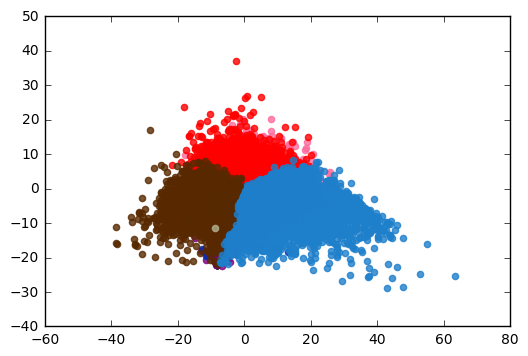

In [14]:
colors=["#372F25", "#FD6C9E", "#FF0000", "#800080", "#FFDE75", "#1FA055", "#ED7F10","#0131B4", "#582900", "#B3B191", "#1E7FCB"]
for color, i, target_name in zip(colors, candidats.columns, majoriteCommune):
    plt.scatter(C[majoriteCommune == i, 1], C[majoriteCommune == i, 2], alpha=.8, color=color,
                label=target_name)

In [15]:
np.transpose([candidats.columns,colors,["Noir","Rose","Rouge","Violet foncé","Jaune","Vert","Orange clair","Bleu foncé","Marron","Gris","Bleu azur"]])

array([['Nicolas DUPONT-AIGNAN', '#372F25', 'Noir'],
       ['Marine LE PEN', '#FD6C9E', 'Rose'],
       ['Emmanuel MACRON', '#FF0000', 'Rouge'],
       ['Benoît HAMON', '#800080', 'Violet foncé'],
       ['Nathalie ARTHAUD', '#FFDE75', 'Jaune'],
       ['Philippe POUTOU', '#1FA055', 'Vert'],
       ['Jacques CHEMINADE', '#ED7F10', 'Orange clair'],
       ['Jean LASALLE', '#0131B4', 'Bleu foncé'],
       ['Jean-Luc MELENCHON', '#582900', 'Marron'],
       ['François ASSELINEAU', '#B3B191', 'Gris'],
       ['François FILLON', '#1E7FCB', 'Bleu azur']], dtype=object)

In [16]:
candidats2=elections[["Voix1", "Voix2", "Voix3", "Voix4", "Voix5", "Voix6", "Voix7", "Voix8", "Voix9", "Voix10", "Voix11"]]
candidats2.columns=["Nicolas DUPONT-AIGNAN", "Marine LE PEN", "Emmanuel MACRON", "Benoît HAMON", "Nathalie ARTHAUD", "Philippe POUTOU", "Jacques CHEMINADE", "Jean LASALLE", "Jean-Luc MELENCHON", "François ASSELINEAU", "François FILLON"]

In [17]:
pca2 = PCA(n_components=5)
pca2.fit(candidats2)
# Estimation, calcul des composantes principales
C2 = pca2.fit(candidats2).transform(candidats2)

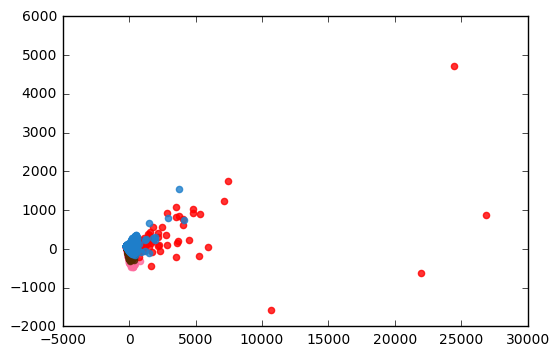

In [18]:
colors=["#372F25", "#FD6C9E", "#FF0000", "#800080", "#FFDE75", "#1FA055", "#ED7F10","#0131B4", "#582900", "#B3B191", "#1E7FCB"]
for color, i, target_name in zip(colors, candidats2.columns, majoriteCommune):
    plt.scatter(C2[majoriteCommune == i, 0], C2[majoriteCommune == i, 1], alpha=.8, color=color,
                label=target_name)

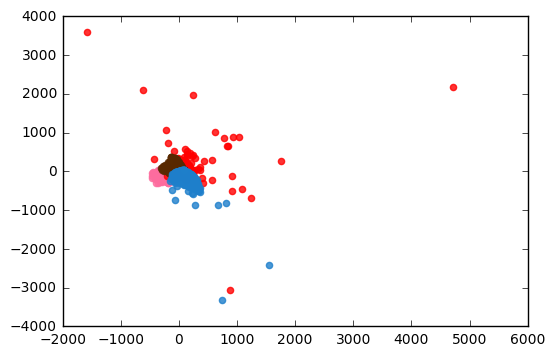

In [19]:
colors=["#372F25", "#FD6C9E", "#FF0000", "#800080", "#FFDE75", "#1FA055", "#ED7F10","#0131B4", "#582900", "#B3B191", "#1E7FCB"]
for color, i, target_name in zip(colors, candidats2.columns, majoriteCommune):
    plt.scatter(C2[majoriteCommune == i, 1], C2[majoriteCommune == i, 2], alpha=.8, color=color,
                label=target_name)

### 2) Simple auto-encoder with keras

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [28]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(11,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(11, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [31]:
x_train = np.array(candidats)
x_test = x_train
print(x_train.shape)

(69242, 11)


In [34]:
autoencoder.fit(x_train, x_train,nb_epoch=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

Train on 69242 samples, validate on 69242 samples
Epoch 1/10
69242/69242 [==============================] - 0s - loss: 1.9913 - val_loss: 0.7471 5120/69242 [=>............................] - ETA: 0s - loss: 4.1512

In [35]:
encoded_imgs_last=encoder.predict(x_test)
decoded_imgs_last=decoder.predict(encoded_imgs_last)

In [36]:
print(x_test[0])
print(decoded_imgs_last[0])

[  5.69  21.07  19.9    4.85   0.67   0.67   0.33   0.33   9.87   1.    18.39]
[  6.05601978  20.7725544   20.15542412   4.97080946   0.39283237
   0.94819748   0.0227501    0.71167219   9.55871201   0.60753983
  18.98992348]
